In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from geopy.distance import distance
from collections import defaultdict

# Plot and aesthetics
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('seaborn-whitegrid')
%matplotlib inline
plt.style.use('fivethirtyeight')
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['figure.figsize'] = 16,8
sns.set_style("whitegrid")
from IPython import display

from datetime import timedelta

In [2]:

firms = pd.read_csv('../data/firms/fire_nrt_J1V-C2_232791.csv')

In [3]:
truth = pd.read_csv('../data/groundTruth/jasdecor_groundata_25_10_2021.csv')

In [4]:
firms.head(1)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,15.36379,77.32999,329.78,0.39,0.59,2021-09-01,726,1,VIIRS,n,2.0NRT,294.9,3.89,D


In [5]:
truth.head(1)

,Id,latitude,longitude,Direction,Crop,Remarks,Date and Time,Start and Stop,Images,Action
0,1,31.490048,74.307994,Left,Rice,dlaksdklalklk,23-10-2021 11:15:17pm,none,NaN,Delete


In [7]:
truth['Crop'].value_counts()

Rice            379
Green Fodder     60
Other            13
Pindi            12
Sugarcane         9
Gobi              6
Mirch             4
Giya              1
Name: Crop, dtype: int64

In [8]:
firms.shape

(32703, 14)

In [9]:
truth.shape

(484, 10)

In [10]:
truth['Date and Time'] = pd.to_datetime(truth['Date and Time'])
firms['acq_date'] = pd.to_datetime(firms['acq_date'])


In [11]:
lat_min = truth.latitude.min()-2*truth.latitude.std()
lat_max = truth.latitude.max()-2*truth.latitude.std()
long_min = truth.longitude.min()-2*truth.longitude.std()
long_max = truth.longitude.max()-2*truth.longitude.std()

date_min = min(pd.to_datetime(truth["Date and Time"])) - timedelta(days=14)
date_max = max(pd.to_datetime(truth["Date and Time"])) + timedelta(days=14)

firms = firms[
    (firms.latitude > lat_min)
    & (firms.latitude < lat_max)
    & (firms.longitude > long_min)
    & (firms.longitude < long_max)
]

firms = firms[(firms['acq_date']>date_min) & (firms['acq_date']<date_max)]

In [12]:
print(firms.shape)

(7450, 14)


In [13]:
df = pd.read_csv('../data/groundTruth/groundTruthMerged.csv')

In [14]:
df['timeDay'] = df.date_dif/(60*60*24)

/Users/cmougan/opt/anaconda3/envs/energy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


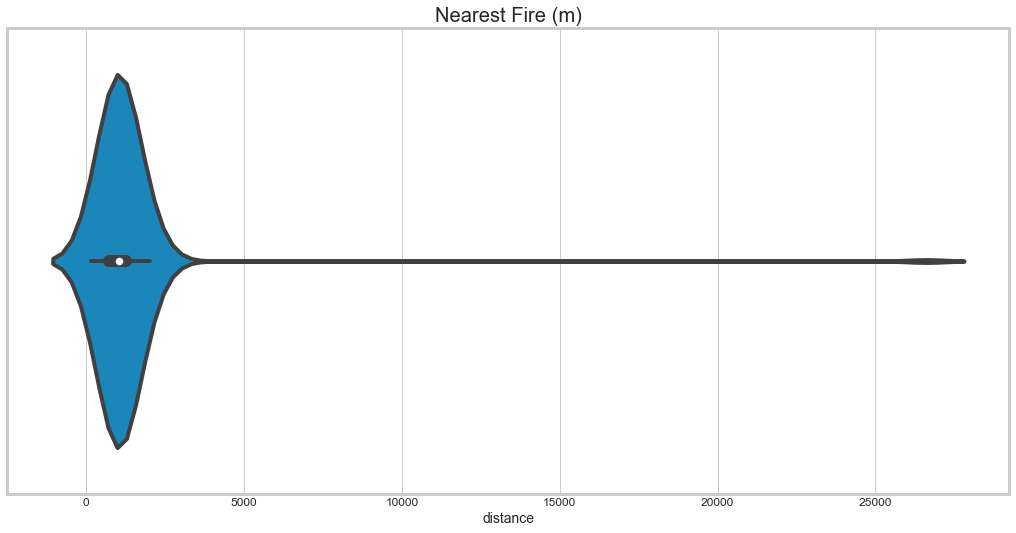

In [15]:
plt.figure()
plt.title('Nearest Fire (m)')
sns.violinplot(df.distance)
plt.show()

/Users/cmougan/opt/anaconda3/envs/energy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


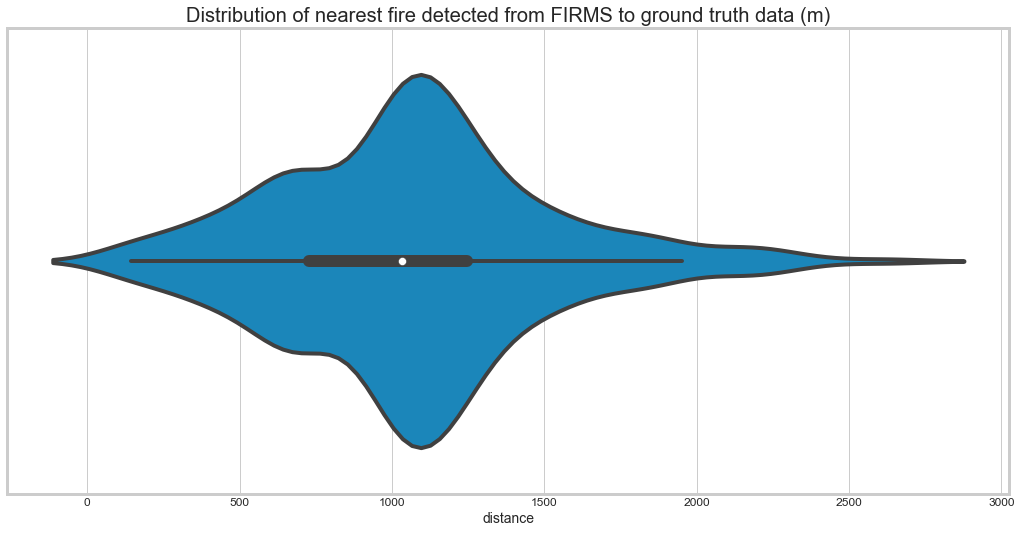

In [16]:
# Distance between real fire and detection (meters)
OFF_DIST = 3_000
aux = df[df.distance<OFF_DIST]

plt.figure()
plt.title('Distribution of nearest fire detected from FIRMS to ground truth data (m)')
sns.violinplot(aux.distance)
plt.show()

/Users/cmougan/opt/anaconda3/envs/energy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


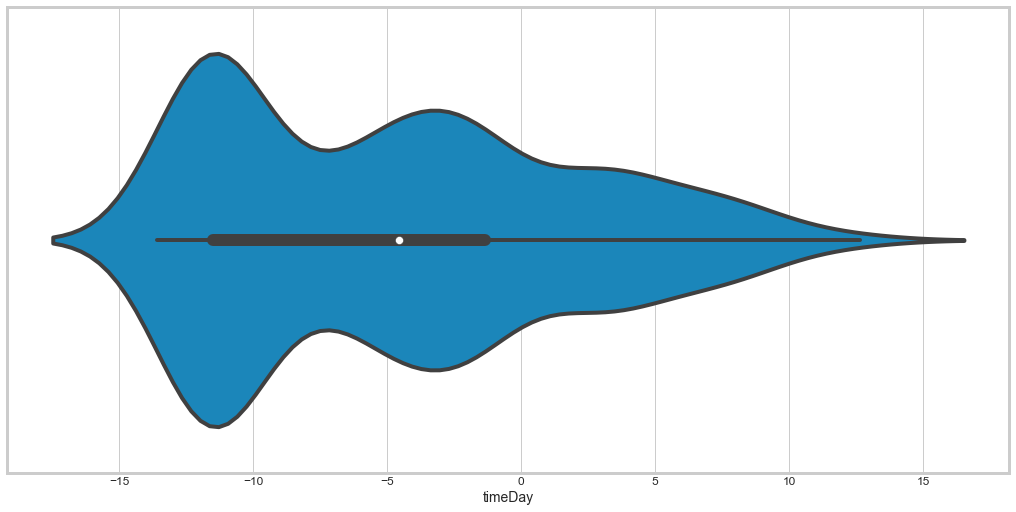

In [17]:
# Dates limit (days)
OFF_DATE = 14

aux = aux[(aux.timeDay>-OFF_DATE)& (aux.timeDay<OFF_DATE)]
plt.figure()
sns.violinplot(aux.timeDay)
plt.show()

## Metrics

In [ ]:
SELECTED_ELEMENTS = truth.shape[0]
TRUE_POSITIVES = aux.shape[0]

FALSE_POSITIVES = SELECTED_ELEMENTS - TRUE_POSITIVES

In [ ]:
DETECTED_FIRES = firms.shape[0]

# This is all the elements flagged by FIRMS
#######################
## HIGHLY MISTAKEN ##
#####################
RELEVANT_ELEMENTS = firms.shape[0]
FALSE_NEGATIVES = RELEVANT_ELEMENTS - TRUE_POSITIVES

<img src="Precisionrecall.png" style="width:400px;height:800px"/>

In [ ]:
print('Precision: ', round(TRUE_POSITIVES/(FALSE_POSITIVES+TRUE_POSITIVES),2))
print('Recall: ', round(TRUE_POSITIVES/(RELEVANT_ELEMENTS),2))

In [ ]:
conf = firms.copy()

In [ ]:
firms